In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import QTable

import warnings
warnings.filterwarnings('ignore')

In [2]:
ravetable = QTable.read('NEW_rave_tgas_query.csv', format='csv')
#parallax error error fixed!

In [3]:
print(ravetable)

row_id    ID_TGAS_source        RA_TGAS       ... phot_g_mean_mag_TGAS   HRV  
------ ------------------- ------------------ ... -------------------- -------
     1 5472450241103924224 156.23182631221437 ...      9.8990624156966  17.929
     2 5472934404177638016  155.6757147543367 ...    9.669932745468348   27.33
     3 5472961651450144128 155.67257158269777 ...    9.403665589028403   12.13
     4 5470860587808517120  158.9734503220959 ...   10.119686672861922  38.949
     5 3468060163078890752 184.89737863576525 ...   10.123850113157598  10.372
     6 6158339888161766400 188.61283657498848 ...    9.852586829713339  34.075
     7 6158610402382100096  188.1046316601183 ...    9.620809841126782 -20.148
     8 6158160633407813888 188.96842670922464 ...    9.936459984602394  36.845
     9 6123173658014875136 213.83424541365062 ...   10.767653224679348 -11.692
    10 6123181698193650176 213.84389869951852 ...    9.535751921865415   7.105
   ...                 ...                ... ...   

In [4]:
pmra = ravetable['pmRA_TGAS']
pmde = ravetable['pmDE_TGAS']
ra = ravetable['RA_TGAS']
dec = ravetable['DE_TGAS']
hrv = ravetable['HRV']
plx = ravetable['parallax_TGAS']
pm = np.sqrt(pmde**2 + (pmra**2) * np.cos(dec)**2)

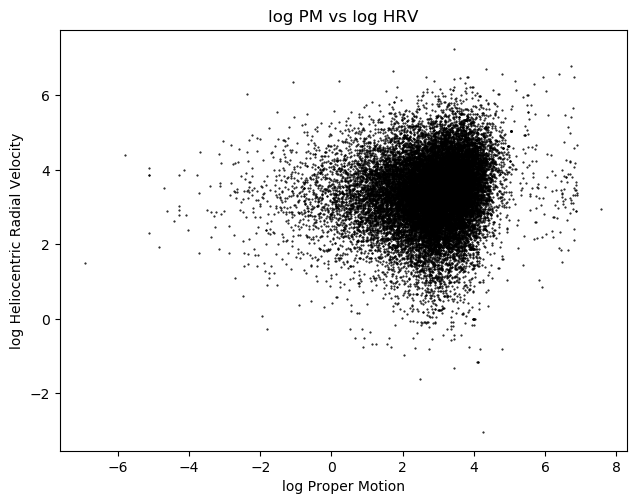

In [5]:
plt.style.use('default')
fig = plt.figure()
ax = fig.add_subplot(111)
#fig.set_size_inches(8,8)
 
fig.tight_layout()

ax.set_ylabel("log Heliocentric Radial Velocity")
ax.set_xlabel("log Proper Motion")
ax.set_title("log PM vs log HRV")
    
ax.plot(np.log(hrv), np.log(pm), color='k', marker='.', markersize=1, linestyle='None');

In [6]:
pmra = pmra * 0.001
pmde = pmde * 0.001
plx = plx * 0.001

In [14]:
rangp = (192.25)
decngp = (27.4)
theta0 = (123)
k = 4.704057
U = None
V = None
W = None

In [8]:
row1 = ravetable[0]
pmra = row1['pmRA_TGAS']
pmde = row1['pmDE_TGAS']
ra = row1['RA_TGAS']
dec = row1['DE_TGAS']
hrv = row1['HRV']
plx = row1['parallax_TGAS']

In [17]:
T1 = np.array( [((np.cos(theta0)), (np.sin(theta0)), 0),
                ((np.sin(theta0)), (-1 * np.cos(theta0)), 0),
                (0,0,1)
               ])

T2 = np.array( [((-1 * np.sin(decngp)), 0, (np.cos(decngp))),
                (0,-1,0),
                ((np.cos(decngp)), 0, (np.sin(decngp)))
               ])

T3 = np.array( [((np.cos(rangp)), (np.sin(rangp)), 0),
                ((np.sin(rangp)), (-1 * np.cos(rangp)), 0),
                (0,0,1)
               ])

T = T1.dot(T2).dot(T3)
#T = T1*T2*T3
print(T)

[[-0.82174676 -0.01560478  0.56963915]
 [ 0.22216476 -0.92930032  0.29503176]
 [ 0.52476194  0.36899514  0.76711635]]


In [18]:
A = np.array( [(np.degrees(np.cos(ra)*np.cos(dec)), -np.degrees(np.sin(ra)), -np.degrees(np.cos(ra)*np.cos(dec))),
                (np.degrees(np.sin(ra)*np.cos(dec)), np.degrees(np.cos(ra)), -np.degrees(np.sin(ra)*np.sin(dec))),
                (np.degrees(np.sin(dec)), 0, np.degrees(np.cos(dec)))
               ])
B = T.dot(A)
print(B)

[[-42.58464796 -35.89555618  55.88657702]
 [ 33.8013271  -25.68378435  27.00541427]
 [-18.07828515  36.53297987  13.16501358]]


In [12]:
GCC = B.dot(np.array( [(hrv),
                       (k*pmra/plx),
                       (k*pmde/plx)
                      ]))
for line in GCC:
    print(*line)

In [ ]:
plt.style.use('default')
fig = plt.figure()
ax = fig.add_subplot(111)
#fig.set_size_inches(8,8)
 
fig.tight_layout()

ax.set_ylabel("log Heliocentric Radial Velocity")
ax.set_xlabel("log Proper Motion")
ax.set_title("log PM vs log HRV")
    
ax.plot(np.log(hrv), np.log(pm), color='k', marker='.', markersize=1, linestyle='None');